<a href="https://colab.research.google.com/github/CakeNuthep/WebScrapCondo/blob/main/webScrapingCondo_Rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
# Imports
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.parse

%matplotlib inline

In [226]:
pd.set_option('display.max_colwidth', None)

In [227]:
# livinginsider's homepage
list_livinginsider_url = ['https://www.livinginsider.com/living_project/14/1136/Condo/Rent/all/1/%E0%B9%84%E0%B8%AD-%E0%B9%80%E0%B8%AE%E0%B8%B2%E0%B8%AA%E0%B9%8C-%E0%B8%9E%E0%B8%A3%E0%B8%B0%E0%B8%A3%E0%B8%B2%E0%B8%A1-9-%E0%B9%80%E0%B8%AD%E0%B8%81%E0%B8%A1%E0%B8%B1%E0%B8%A2.html',
                          'https://www.livinginsider.com/living_project/14/1136/Condo/Rent/all/2/%E0%B9%84%E0%B8%AD-%E0%B9%80%E0%B8%AE%E0%B8%B2%E0%B8%AA%E0%B9%8C-%E0%B8%9E%E0%B8%A3%E0%B8%B0%E0%B8%A3%E0%B8%B2%E0%B8%A1-9-%E0%B9%80%E0%B8%AD%E0%B8%81%E0%B8%A1%E0%B8%B1%E0%B8%A2.html']


In [228]:
def cleanCost(text):
  new_str = text.replace('฿', '')
  new_str = new_str.replace('/ด.','')
  new_str = new_str.replace(',','')
  return new_str.strip()

def cleanSize(text):
  new_str = text.replace('ตร.ม.', '')
  return new_str.strip()

def cleanFloor(text):
  new_str = text.replace('ชั้นที่', '')
  return new_str.strip()

def cleanbed(text):
  new_str = text.replace('ห้องนอน', '')
  return new_str.strip()

def cleanbath(text):
  new_str = text.replace('ห้องน้ำ', '')
  return new_str.strip()

In [229]:
def scrabData(livinginsider_soup):
  lst = []
  for condo in livinginsider_soup.find_all('div', {'class': 'istock-list'}):
    # print(condo)
    item = condo.find('div', {'class': 'item-img'})
    condo_result = {}
    if(item):
      listing_cost = item.find('div', {'class': 'listing-cost'}).find('div').text
      listing_cost = cleanCost(listing_cost)
      a_tag = item.find('a')
      url = a_tag.get("href")
      url = urllib.parse.unquote(url)
      condo_result['URL']=url
      condo_result['COST']=listing_cost
      print(url)
      print(listing_cost)

    desc = condo.find('div', {'class': 'item-desc'})
    if(desc):
      title = desc.find('a').find('p').text.strip()


      listing_desc = desc.find_all('div', {'class': 'ic-detail'})
      size = listing_desc[0].text.strip()
      size = cleanSize(size)

      floor = listing_desc[1].text.strip()
      floor = cleanFloor(floor)

      bed = listing_desc[2].text.strip()
      bed = cleanbed(bed)

      bath = listing_desc[3].text.strip()
      bath = cleanbath(bath)

      condo_result['TITLE']=title
      condo_result['SIZE']=size
      condo_result['FLOOR']=floor
      condo_result['BED']=bed
      condo_result['BATH']=bath
      print(f"{title} {size} {floor} {bed} {bath}")
      s = pd.Series(data=condo_result, index=['TITLE','URL', 'COST', 'SIZE','FLOOR','BED','BATH'])
      lst.append(s)
  return lst



In [230]:
allPage = []
for livinginsider_url in list_livinginsider_url:
  # Use requests to retrieve data from a given URL
  livinginsider_response = requests.get(livinginsider_url, headers={'User-Agent': 'Mozilla/5.0'})

  # Parse the whole HTML page using BeautifulSoup
  livinginsider_soup = BeautifulSoup(livinginsider_response.text, 'html.parser')

  lst = scrabData(livinginsider_soup)
  allPage = allPage + lst


https://www.livinginsider.com/livingdetail/1767371/For-rent-คอนโด-✦Ihouse-Rama9-Ekamai✦ตกแต่งครบ-พร้อมเข้าอยู่-HF1184.html
9000
🧸🎈For rent คอนโด ✦Ihouse​ Rama9​-Ekamai✦ตกแต่งครบ พร้อมเข้าอยู่!!🌸 #HF1184 28 2 1 1
https://www.livinginsider.com/livingdetail/1854169/รหัสทรัพย์-PN182-ว่างให้เช่าด่วน-I-House-Rama-IX-Ekamai-ไอ-เฮาส์-พระราม-9-เอกมัย-สนใจต่อร.html
8000
รหัสทรัพย์ #PN182 ว่างให้เช่าด่วน!! : I-House Rama IX - Ekamai (ไอ-เฮาส์ พระราม 9 - เอกมัย) สนใจต่อรองราคาแอดไลน์ @condo168 (มี @ ข้างหน้าด้วยนะคะ) 26 1-4 ห้องสตูดิโอ 1
https://www.livinginsider.com/livingdetail/1806387/For-rent-ให้เช่า-I-house-rama9-ekkamai-พระรามเก้า-เอกมัย-Studio-26-ตร-ม-ชั้น-4-ตึก-A-ราคา-9000-บา.html
9000
For rent ให้เช่า I house rama9 ekkamai (พระรามเก้า เอกมัย) Studio 26 ตร.ม ชั้น 4 ตึก A ราคา 9,000 บาท เฟอร์ใหม่ 26 4 ห้องสตูดิโอ 1
https://www.livinginsider.com/livingdetail/1275882/คอนโดให้เช่า-9000บาท.html
9000
คอนโดให้เช่า 9,000บาท 28 1-4 ห้องสตูดิโอ 1
https://www.livinginsider.com/livingdetail/1821616/ด่

In [231]:
data = pd.concat(allPage, axis=1).T

In [232]:
data

,TITLE,URL,COST,SIZE,FLOOR,BED,BATH
0,🧸🎈For rent คอนโด ✦Ihouse​ Rama9​-Ekamai✦ตกแต่งครบ พร้อมเข้าอยู่!!🌸 #HF1184,https://www.livinginsider.com/livingdetail/1767371/For-rent-คอนโด-✦Ihouse-Rama9-Ekamai✦ตกแต่งครบ-พร้อมเข้าอยู่-HF1184.html,9000,28,2,1,1
1,รหัสทรัพย์ #PN182 ว่างให้เช่าด่วน!! : I-House Rama IX - Ekamai (ไอ-เฮาส์ พระราม 9 - เอกมัย) สนใจต่อรองราคาแอดไลน์ @condo168 (มี @ ข้างหน้าด้วยนะคะ),https://www.livinginsider.com/livingdetail/1854169/รหัสทรัพย์-PN182-ว่างให้เช่าด่วน-I-House-Rama-IX-Ekamai-ไอ-เฮาส์-พระราม-9-เอกมัย-สนใจต่อร.html,8000,26,1-4,ห้องสตูดิโอ,1
2,"For rent ให้เช่า I house rama9 ekkamai (พระรามเก้า เอกมัย) Studio 26 ตร.ม ชั้น 4 ตึก A ราคา 9,000 บาท เฟอร์ใหม่",https://www.livinginsider.com/livingdetail/1806387/For-rent-ให้เช่า-I-house-rama9-ekkamai-พระรามเก้า-เอกมัย-Studio-26-ตร-ม-ชั้น-4-ตึก-A-ราคา-9000-บา.html,9000,26,4,ห้องสตูดิโอ,1
3,"คอนโดให้เช่า 9,000บาท",https://www.livinginsider.com/livingdetail/1275882/คอนโดให้เช่า-9000บาท.html,9000,28,1-4,ห้องสตูดิโอ,1
4,🔥🔥ด่วน ‼️ ให้เช่า พร้อมเข้าอยู่ คอนโด ไอ-เฮาส์ พระราม 9 – เอกมัย 🟠AS2309-014,https://www.livinginsider.com/livingdetail/1821616/ด่วน-️-ให้เช่า-พร้อมเข้าอยู่-คอนโด-ไอ-เฮาส์-พระราม-9-เอกมัย-🟠AS2309-014.html,9000,26,8,ห้องสตูดิโอ,1
5,รีบจอง 🔥🔥🔥 ให้เช่า I House เอกมัย-พระราม 9 ห้องสวย เฟอร์ครบ‼️ พร้อมเข้าอยู่,https://www.livinginsider.com/livingdetail/1842941/รีบจอง-ให้เช่า-I-House-เอกมัย-พระราม-9-ห้องสวย-เฟอร์ครบ️-พร้อมเข้าอยู่.html,7490,28,1-4,1,1
6,"🔥 คอนโดให้เช่า Ihouse​ Rama 9​-Ekamai (ไอเฮ้าส์ พระราม 9-เอกมัย ) 🚆 MRT พระราม 9,MRT เพชรบุรี",https://www.livinginsider.com/livingdetail/1768442/-คอนโดให้เช่า-Ihouse-Rama-9-Ekamai-ไอเฮ้าส์-พระราม-9-เอกมัย-MRT-พระราม-9MRT-เพชรบุรี.html,12000,28,1-4,1,1
7,ให้เช่า คอนโด ไอ-เฮาส์ พระราม 9 - เอกมัย ใกล้ MRT พระราม 9,https://www.livinginsider.com/livingdetail/1836275/ให้เช่า-คอนโด-ไอ-เฮาส์-พระราม-9-เอกมัย-ใกล้-MRT-พระราม-9.html,8000,28,4,ห้องสตูดิโอ,1
8,🔥🔥ด่วน ให้เช่า ห้องใหม่ ‼️ พร้อมอยู่ ( 1 ห้องนอน 28 ตร.ม.) คอนโด ไอ-เฮาส์ พระราม 9 – เอกมัย 🟠TK2307-461,https://www.livinginsider.com/livingdetail/1734205/ด่วน-ให้เช่า-ห้องใหม่-️-พร้อมอยู่-1-ห้องนอน-28-ตร-ม-คอนโด-ไอ-เฮาส์-พระราม-9-เอกมัย-🟠TK2307-.html,12000,28,7,ห้องสตูดิโอ,1
9,🔥🔥ด่วน ให้เช่า‼️คอนโด ไอ-เฮาส์ พระราม 9 – เอกมัย 🟠DA2307-044,https://www.livinginsider.com/livingdetail/1793550/ด่วน-ให้เช่า️คอนโด-ไอ-เฮาส์-พระราม-9-เอกมัย-🟠DA2307-044.html,16000,56,7,1,1


In [233]:
data['COST'] = data['COST'].astype('float')
data['SIZE'] = data['SIZE'].astype('float')

In [234]:
data['SIZE Per M2'] = data['COST']/data['SIZE']

In [235]:
data['ESTIMATE Property'] = data['COST']*150

In [236]:
data[['COST','SIZE','FLOOR','ESTIMATE Property','SIZE Per M2']].sort_values(by=['SIZE Per M2'])

,COST,SIZE,FLOOR,ESTIMATE Property,SIZE Per M2
37,7000.0,30.0,5-10,1050000.0,233.333333
16,7000.0,30.0,5-10,1050000.0,233.333333
31,7800.0,30.0,1,1170000.0,260.000000
10,7800.0,30.0,1,1170000.0,260.000000
5,7490.0,28.0,1-4,1123500.0,267.500000
26,7490.0,28.0,1-4,1123500.0,267.500000
38,7500.0,28.0,1-4,1125000.0,267.857143
17,7500.0,28.0,1-4,1125000.0,267.857143
34,7500.0,27.0,4,1125000.0,277.777778
13,7500.0,27.0,4,1125000.0,277.777778


In [237]:
data[['COST','SIZE','FLOOR','ESTIMATE Property']].sort_values(by=['ESTIMATE Property'])

,COST,SIZE,FLOOR,ESTIMATE Property
37,7000.0,30.0,5-10,1050000.0
16,7000.0,30.0,5-10,1050000.0
5,7490.0,28.0,1-4,1123500.0
26,7490.0,28.0,1-4,1123500.0
38,7500.0,28.0,1-4,1125000.0
17,7500.0,28.0,1-4,1125000.0
34,7500.0,27.0,4,1125000.0
13,7500.0,27.0,4,1125000.0
10,7800.0,30.0,1,1170000.0
31,7800.0,30.0,1,1170000.0


In [238]:
print(f"cost max: {data['COST'].max()}, cost min: {data['COST'].min()}, cost mean: {data['COST'].mean()}")

cost max: 16000.0, cost min: 7000.0, cost mean: 9275.714285714286


In [239]:
print(f"ESTIMATE Property max: {data['ESTIMATE Property'].max()}, ESTIMATE Property min: {data['ESTIMATE Property'].min()}, ESTIMATE Property mean: {data['ESTIMATE Property'].mean()}")

ESTIMATE Property max: 2400000.0, ESTIMATE Property min: 1050000.0, ESTIMATE Property mean: 1391357.142857143


<Axes: ylabel='Frequency'>

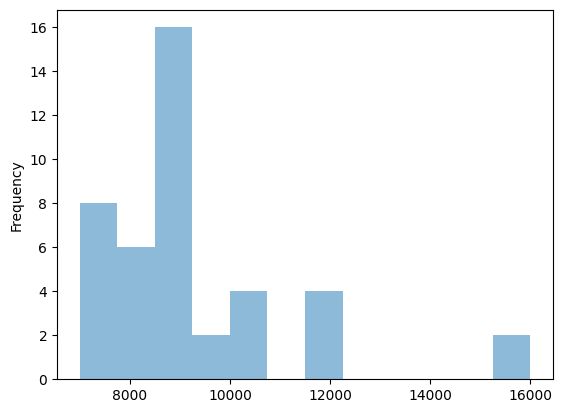

In [240]:
data['COST'].plot.hist(bins=12,alpha=0.5)

<Axes: ylabel='Frequency'>

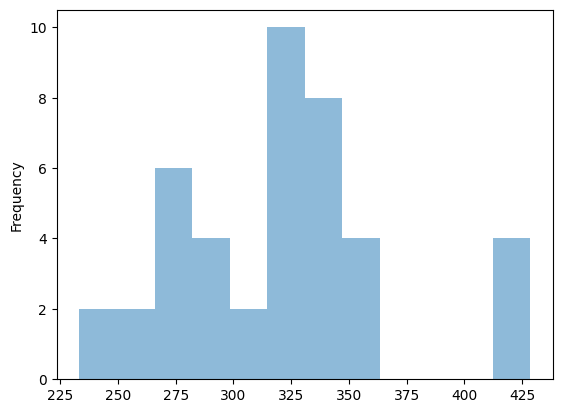

In [241]:
data['SIZE Per M2'].plot.hist(bins=12,alpha=0.5)

<Axes: ylabel='Frequency'>

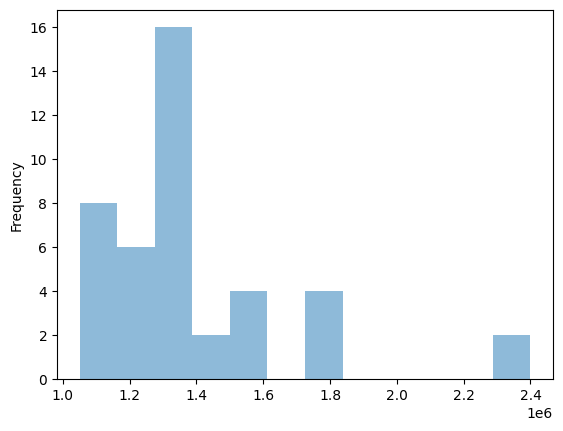

In [242]:
data['ESTIMATE Property'].plot.hist(bins=12,alpha=0.5)

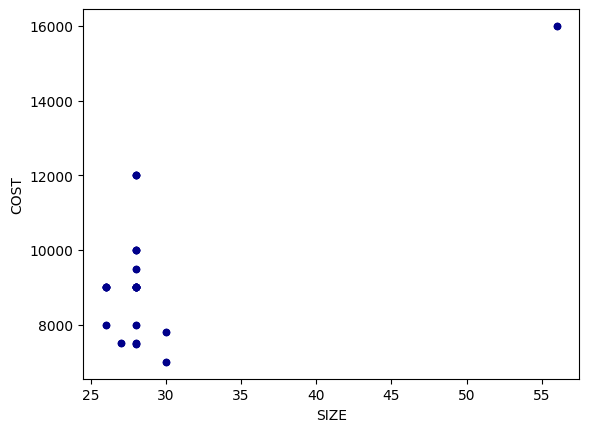

In [243]:
ax1 = data.plot.scatter(x='SIZE',
                      y='COST',
                      c='DarkBlue')

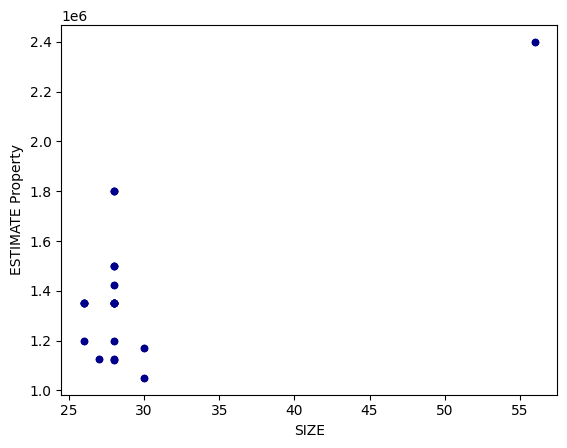

In [245]:
ax1 = data.plot.scatter(x='SIZE',
                      y='ESTIMATE Property',
                      c='DarkBlue')

In [249]:
data.to_excel('rent.xlsx')